# Lending Club - Analysis

### Business Problem:

✓ Consumer Finance Company is the largest online loan marketplace, facilitating personal loans, business loans,
and financing of medical procedures.
✓ It specializes in lending various types of loans to urban customers. When the company receives a loan application,
the company has to make a decision for loan approval based on the applicant’s profile.

***Business Objective/Goals:***

✓ Lending Club wants to understand the driving factors behind loan default, i.e. the driver variables which are
strong indicators of default.
✓ The company wants to utilize this knowledge for its portfolio and risk assessment.
✓ The aim is to identify patterns which indicate if a person is likely to default

The analysis is divided into four main parts:

 1. Data understanding - Structural Investigation
 2. Data Quality and Fix (cleaning missing values, removing redundant columns etc.)
 3. Data Content Analysis - Univariate and Bi-variate Analysis
 4. Recommendations to Business


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

## 1. Data Understanding - Structural Investigation

In [105]:
loan = pd.read_csv("loan.csv", sep=",")
print(loan.shape)
loan.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [106]:
# let's look at the first few rows of the df
loan.head(3).append(loan.tail(3))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Looking at all the column names

l= len(loan.columns)
lst = list(loan.columns)
print("Total No. of Cols:", l)
for i in range(l):
    print(i,":",lst[i],end ="    ")

Total No. of Cols: 111
0 : id    1 : member_id    2 : loan_amnt    3 : funded_amnt    4 : funded_amnt_inv    5 : term    6 : int_rate    7 : installment    8 : grade    9 : sub_grade    10 : emp_title    11 : emp_length    12 : home_ownership    13 : annual_inc    14 : verification_status    15 : issue_d    16 : loan_status    17 : pymnt_plan    18 : url    19 : desc    20 : purpose    21 : title    22 : zip_code    23 : addr_state    24 : dti    25 : delinq_2yrs    26 : earliest_cr_line    27 : inq_last_6mths    28 : mths_since_last_delinq    29 : mths_since_last_record    30 : open_acc    31 : pub_rec    32 : revol_bal    33 : revol_util    34 : total_acc    35 : initial_list_status    36 : out_prncp    37 : out_prncp_inv    38 : total_pymnt    39 : total_pymnt_inv    40 : total_rec_prncp    41 : total_rec_int    42 : total_rec_late_fee    43 : recoveries    44 : collection_recovery_fee    45 : last_pymnt_d    46 : last_pymnt_amnt    47 : next_pymnt_d    48 : last_credit_pull_d    49

In [108]:
# Understanding the feature names in the dataset
print("Total No. of Col:",len(loan.columns))
loan.dtypes.value_counts()

Total No. of Col: 111


float64    74
object     24
int64      13
dtype: int64

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which we want to compare across the independent variables, is **loan status**. The strategy is to compare the average default rates across various independent variables and identify the  ones that affect default rate the most.


## 2. Data Quality and Fix

We will focus on the below checks from data quality perspective:
   - Check duplicates
   - Check null values
   - Delete irrelevant features
  

**Duplicate Check**

In [109]:
# Check unique values for col id
print("Unique IDs present:", len(loan.id.value_counts()))

#Check for duplicate w/o ID
duplicate_row = loan.drop(labels=["id"], axis=1).duplicated().sum()
print("No. of duplicates records: ", duplicate_row)

Unique IDs present: 39717
No. of duplicates records:  0


**Check Null Values**

In [110]:
# summarising number of missing values in each features
l1 = loan.isnull().sum()
l2 = round(loan.isnull().sum()/len(loan.index), 3)*100
missing_val = pd.DataFrame(list(zip(l1, l2)),columns =['Missing_Values', 'Missing_Values %'])
df1 = pd.DataFrame(loan.columns, columns =['Original Features'])
missing_val = pd.merge(df1, missing_val, left_index=True, right_index=True)
missing_val.head(120)

,Original Features,Missing_Values,Missing_Values %
0,id,0,0.0
1,member_id,0,0.0
2,loan_amnt,0,0.0
3,funded_amnt,0,0.0
4,funded_amnt_inv,0,0.0
5,term,0,0.0
6,int_rate,0,0.0
7,installment,0,0.0
8,grade,0,0.0
9,sub_grade,0,0.0


You can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

Library <a href = "https://github.com/ResidentMario/missingno"> missingno </a> has a nice feature where you can see the distribution of NaN values either in a matrix representation or a bar graph representation.

<AxesSubplot:>

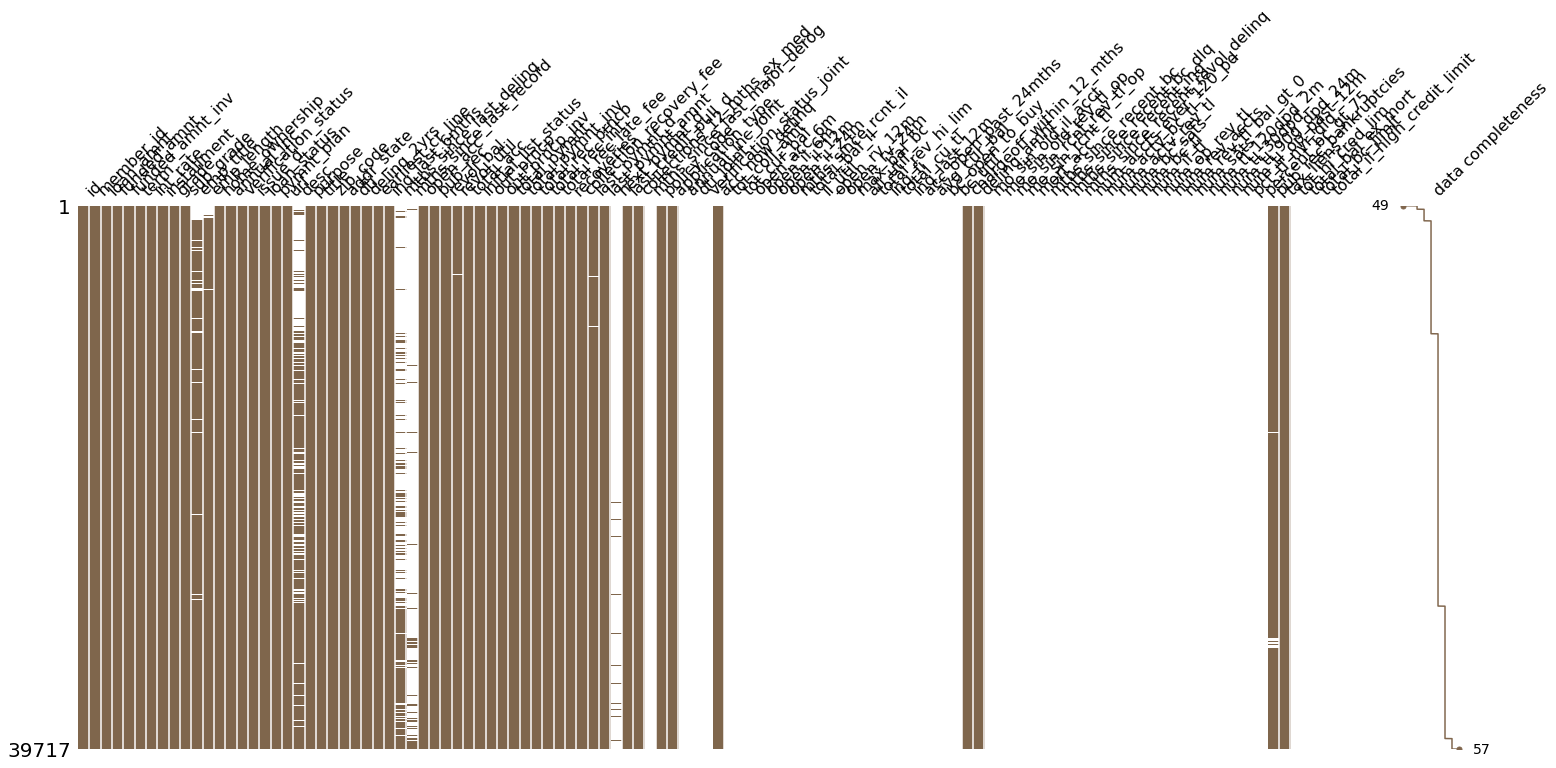

In [111]:
import missingno as msno
%matplotlib inline
msno.matrix(loan, labels=True, sort="ascending", color=(0.5, 0.4, 0.3))

<AxesSubplot:>

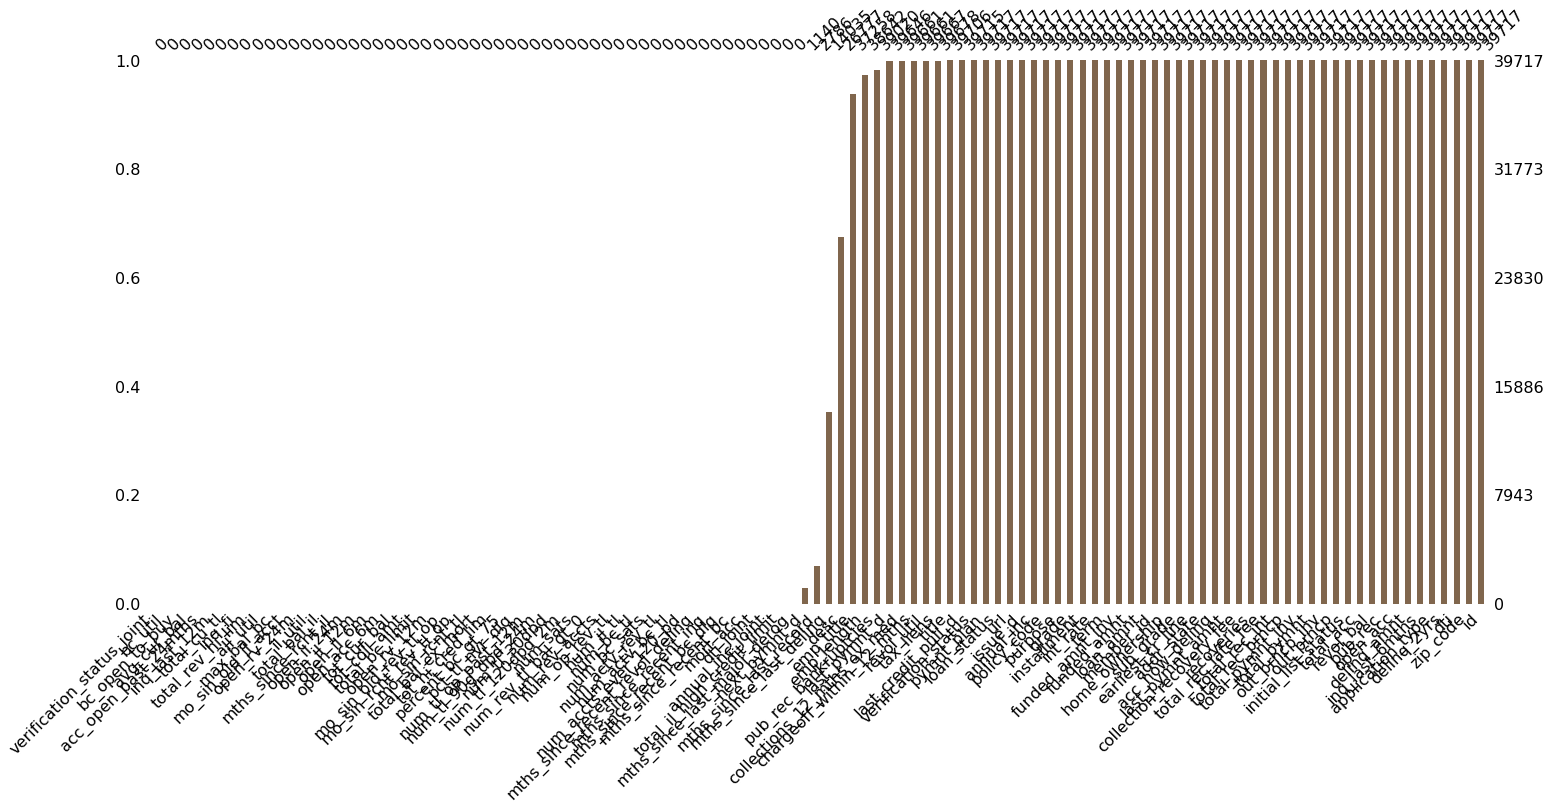

In [112]:
%matplotlib inline
msno.bar(loan, labels=True, sort="ascending", color=(0.5, 0.4, 0.3))

In [113]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print("Number of Col. having more than 90% missing values:", len(missing_columns))
print(missing_columns)

Number of Col. having more than 90% missing values: 56
Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num

In [114]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [115]:
# summarising number of missing values in each features again
l1 = loan.isnull().sum()
l2 = round(loan.isnull().sum()/len(loan.index), 3)*100
missing_val = pd.DataFrame(list(zip(l1, l2)),columns =['Missing_Values', 'Missing_Values %'])
df1 = pd.DataFrame(loan.columns, columns =['Original Features'])
missing_val = pd.merge(df1, missing_val, left_index=True, right_index=True)
missing_val.head(60)

,Original Features,Missing_Values,Missing_Values %
0,id,0,0.0
1,member_id,0,0.0
2,loan_amnt,0,0.0
3,funded_amnt,0,0.0
4,funded_amnt_inv,0,0.0
5,term,0,0.0
6,int_rate,0,0.0
7,installment,0,0.0
8,grade,0,0.0
9,sub_grade,0,0.0


There are now 2 columns having approx. 32% and 64% missing values - `description` and `months since last delinquent`

In [116]:
# let's have a look at a few entries in the columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head(10)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
5,NaN,NaN
6,Borrower added on 12/18/11 > I am planning o...,NaN
7,Borrower added on 12/16/11 > Downpayment for...,NaN
8,Borrower added on 12/21/11 > I own a small h...,NaN
9,Borrower added on 12/16/11 > I'm trying to b...,NaN


## Word Cloud

Although column `desc` doesnt have much significance w.r.to loan status, we will see if we can build a word cloud and extract the top 15-20 words mentioned by cusotmer while applying for a loan.

In [117]:
loan['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [118]:
# Replace "Borrower added on 12/22/11 >" with blank
loan['desc'] = loan['desc'].replace('Borrower added on.>*','', regex=True)
loan['desc'] = loan['desc'].replace(['br', 'im'],'', regex=True)
print(loan['desc'])

0          12/22/11 > I need to upgrade my business tec...
1          12/22/11 > I plan to use this money to finan...
2                                                      NaN
3          12/21/11 > to pay for property tax (borrow f...
4          12/21/11 > I plan on combining three large i...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object


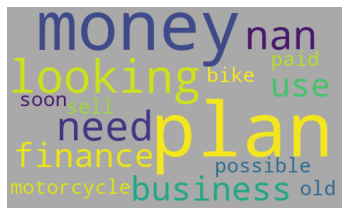

In [119]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = loan['desc'].values 

wordcloud = WordCloud(background_color="darkgrey", max_words = 15, width=500, height=300).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We have not done state of the art text cleaning here. Tghe idea is to show case what can be done with the text present in the dataset and you can already see some of the reasons that customers mention in application are - _need, plan, finance, money, business etc.._

The column description contains the comments the applicant had written while applying for the loan. The default rate is not impacted by the description, so this feature can be deleted.   

Secondly, months since last delinquent represents the number of months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), so it cannot be used as a predictor of default at the time of loan approval. **Thus, let's drop these two columns.**

In [120]:
# dropping the two columns
loan = loan.drop(['desc','mths_since_last_delinq'], axis=1)

In [121]:
# quck check on shape
loan.shape

(39717, 53)

<AxesSubplot:>

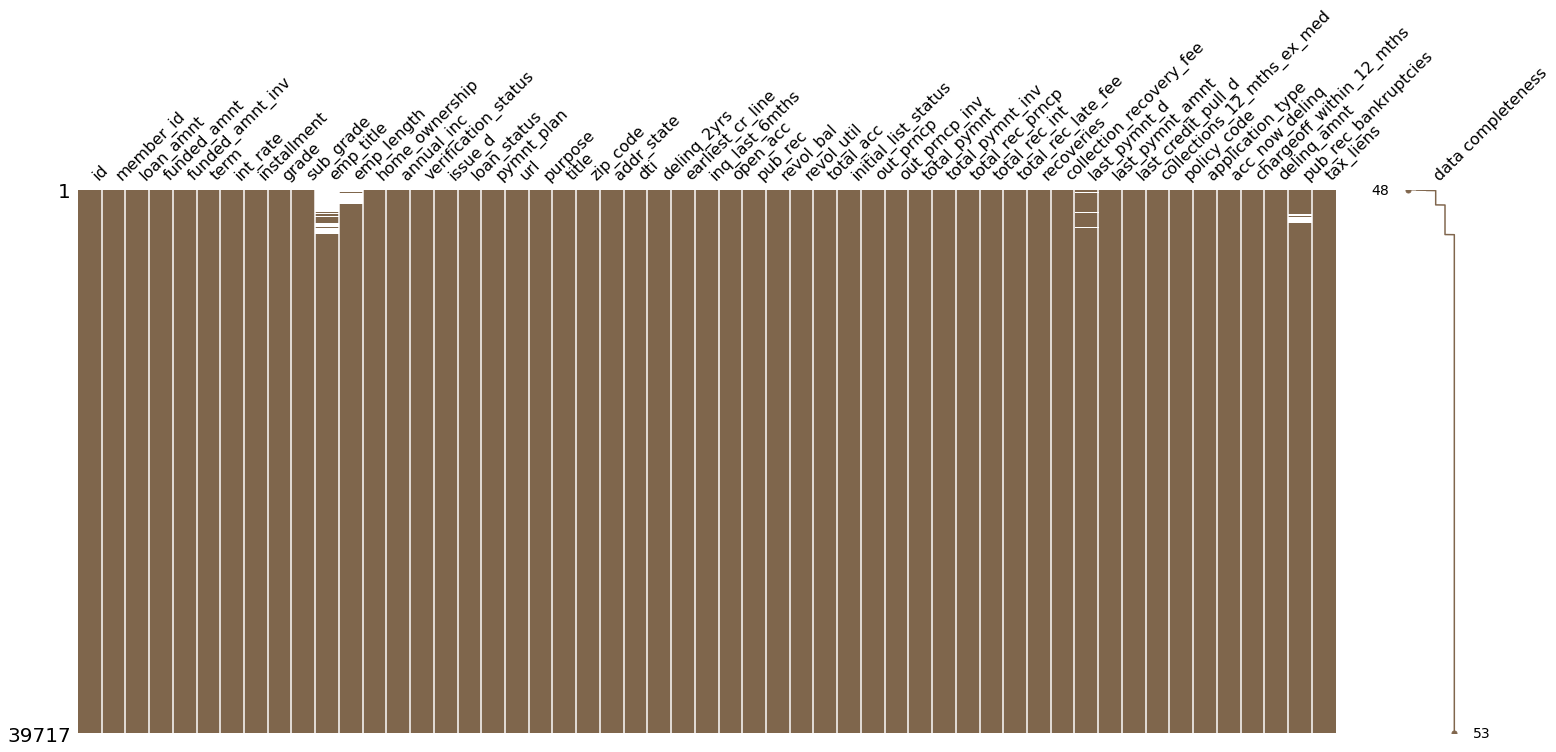

In [122]:
import missingno as msno
%matplotlib inline
msno.matrix(loan, labels=True, sort="ascending", color=(0.5, 0.4, 0.3))


<AxesSubplot:>

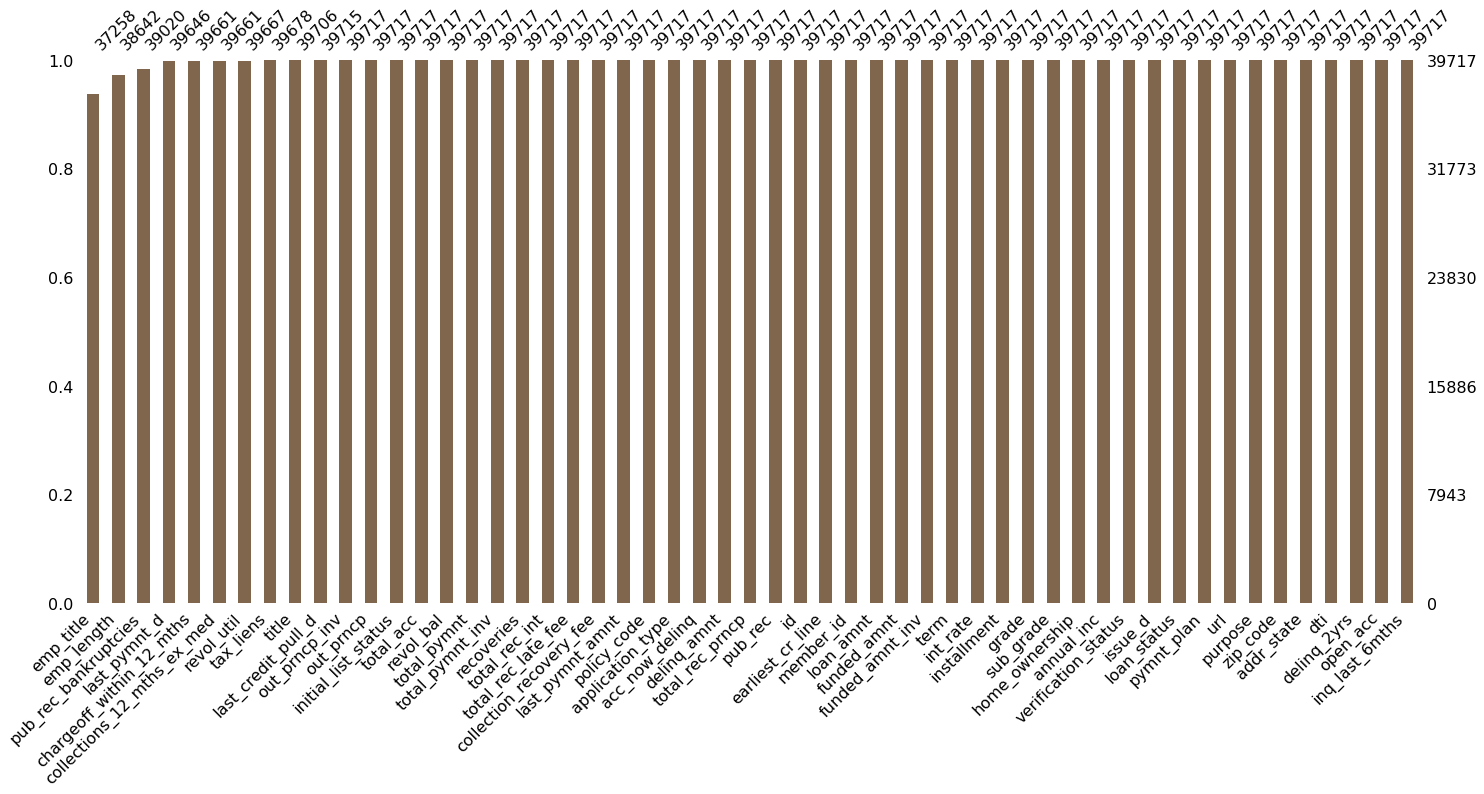

In [123]:
msno.bar(loan, labels=True, sort="ascending", color=(0.5, 0.4, 0.3))

There are some more columns with missing values, but let's ignore them for now (since we are ntot doing any modeling, we don't need to impute all missing values anyway). 

But let's check whether some rows have a large number of missing values.

In [124]:
# checking whether some rows have more than 5 missing values (out of 53 features)
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [125]:
# Check unique values for col id
print("Unique Emp ID present:", len(loan.emp_title.value_counts()))

Unique Emp ID present: 28820


In [126]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [127]:
# let's have a look at a few for columns INterest Rate and Emp. Length as they are object, but should have been numeric
loan.loc[:, ['int_rate', 'emp_length']].head()

,int_rate,emp_length
0,10.65%,10+ years
1,15.27%,< 1 year
2,15.96%,10+ years
3,13.49%,10+ years
4,12.69%,1 year


So, these two columns have issues. We will fix these two issue so that they have the right data types and data content.

In [128]:
# The column int_rate is character type, let's convert it to float
print("Before:", loan['int_rate'].dtype)
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
print("After:", loan['int_rate'].dtype)

Before: object
After: float64


In [129]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code will error out)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [130]:
# looking at type of the columns again
print(loan.shape)
print(loan.loc[:, ['int_rate', 'emp_length']].head())

(38642, 53)
   int_rate  emp_length
0     10.65          10
1     15.27           1
2     15.96          10
3     13.49          10
4     12.69           1


## 3. Data Content Analysis

Let's now move to data content analysis - the most important part for this assignment.
To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. The **objective** is to identify **predictors of loan default** so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
Now, there are broadly three types of variables:
- 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
- 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)
- 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for loan approval. So, we will use only the other two types of variables.

In [131]:
behaviour_var =  ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                  "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp",
                  "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d", "collections_12_mths_ex_med", 
                  "chargeoff_within_12_mths", "pub_rec_bankruptcies", "tax_liens"]
print("No. of behavioural features:", len(behaviour_var))

No. of behavioural features: 24


In [132]:
# let's now remove the behaviour variables from analysis
print("Before:",loan.shape)
loan = loan.drop(behaviour_var, axis=1)
print("After:",loan.shape)

Before: (38642, 53)
After: (38642, 29)


Some of the demographic features of cusomters may not b influencing the loan status, so, we can get rid of all these variables as well.

In [133]:
print("Before:",loan.shape)
loan = loan.drop(['title', 'url', 'zip_code'], axis=1)
print("After:",loan.shape)

Before: (38642, 29)
After: (38642, 26)


In [134]:
# summarising number of missing values in each features again
l1 = loan.isnull().sum()
l2 = round(loan.isnull().sum()/len(loan.index), 3)*100
missing_val = pd.DataFrame(list(zip(l1, l2)),columns =['Missing_Values', 'Missing_Values %'])
df1 = pd.DataFrame(loan.columns, columns =['Original Features'])
missing_val = pd.merge(df1, missing_val, left_index=True, right_index=True)
missing_val.head(60)

,Original Features,Missing_Values,Missing_Values %
0,id,0,0.0
1,member_id,0,0.0
2,loan_amnt,0,0.0
3,funded_amnt,0,0.0
4,funded_amnt_inv,0,0.0
5,term,0,0.0
6,int_rate,0,0.0
7,installment,0,0.0
8,grade,0,0.0
9,sub_grade,0,0.0


So, only columns that have some null values is `emp_title`. When we examin this column, we find that this is categorical data with more than 25000 unique values, so from EDA perspective, this doesn't add any value. So, we will leave this column as it.

In [135]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38642 non-null  int64  
 1   member_id            38642 non-null  int64  
 2   loan_amnt            38642 non-null  int64  
 3   funded_amnt          38642 non-null  int64  
 4   funded_amnt_inv      38642 non-null  float64
 5   term                 38642 non-null  object 
 6   int_rate             38642 non-null  float64
 7   installment          38642 non-null  float64
 8   grade                38642 non-null  object 
 9   sub_grade            38642 non-null  object 
 10  emp_title            37202 non-null  object 
 11  emp_length           38642 non-null  int64  
 12  home_ownership       38642 non-null  object 
 13  annual_inc           38642 non-null  float64
 14  verification_status  38642 non-null  object 
 15  issue_d              38642 non-null 

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1.
 - 0 : Fully Paid
 - 1 : Defaulted

In [136]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

You can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1. 

In [137]:
# filtering only fully paid or charged-off
print("Before:",loan.shape)
loan = loan[loan['loan_status'] != 'Current']
print("After:",loan.shape)
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

Before: (38642, 26)
After: (37544, 26)


0    32145
1     5399
Name: loan_status, dtype: int64

#### Univariate Analysis

Our dataset looks clean and consize now. So, we will start analyzing the content w.r.to one varibales at a time.

In [138]:
# overall default rate
round(np.mean(loan['loan_status']*100), 2)

14.38

The overall default rate is about 14%.  

Let's first visualise the average default rates across categorical variables.


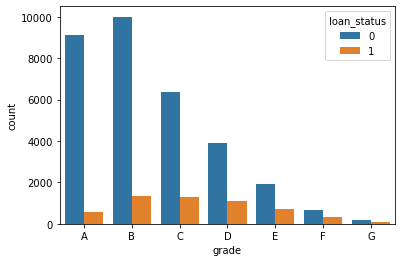

In [139]:
# plotting default rates across grade of the loan
grade = sorted(loan.grade.unique().tolist())
sns.barplot(x='grade', y='loan_status', data=loan, order=grade)
sns.countplot(x='grade', data=loan, hue='loan_status', order=grade)
plt.show()

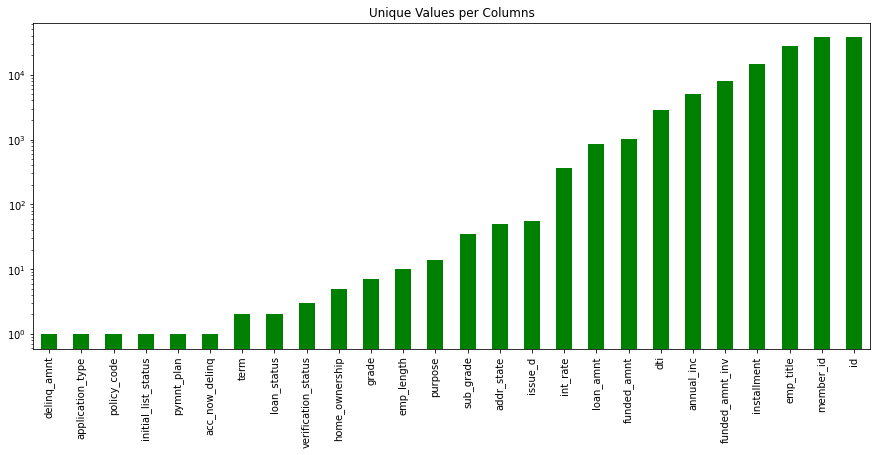

In [140]:
# For each numerical feature compute number of unique entries
unique_values = loan.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 6), title="Unique Values per Columns", color = "green");

Looking at the above graph, some of the columns seems to have `only one unique value` OR all the values are `distinc`. They can be either dropped ot left from the analysis as No analysis is possible with a single value.

In [214]:
col = ['delinq_amnt','application_type', 'policy_code', 'initial_list_status','pymnt_plan', 
       'acc_now_delinq','id','member_id']
print("No. of records in df is:", loan.shape[0])
for i in col:
    print(i,":", loan[i].nunique())

No. of records in df is: 37544
delinq_amnt : 1
application_type : 1
policy_code : 1
initial_list_status : 1
pymnt_plan : 1
acc_now_delinq : 1
id : 37544
member_id : 37544


In [211]:
# lets define a function to plot loan_status across categorical variables - we will call this function for diff variables
def plot_var(cat_var, label):
    
    f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
    
    
    sns.countplot(loan[cat_var], order=sorted(loan[cat_var].unique()), palette='tab10',ax=ax1)
    ax1.set_xlabel(label, fontsize = 14, color = 'black')
    ax1.set_ylabel('Count', fontsize = 14, color = 'green')
    ax1.set_title(label, fontsize = 14, color = 'black')
    
    
    sns.barplot(x=cat_var, y='loan_status', data=loan, order = sorted(loan[cat_var].unique().tolist()), palette='tab10',ax=ax2)
    ax2.set_xlabel(label, fontsize = 14, color = 'black')
    ax2.set_ylabel('Dafault Rate', fontsize = 14, color = 'red')
    
   

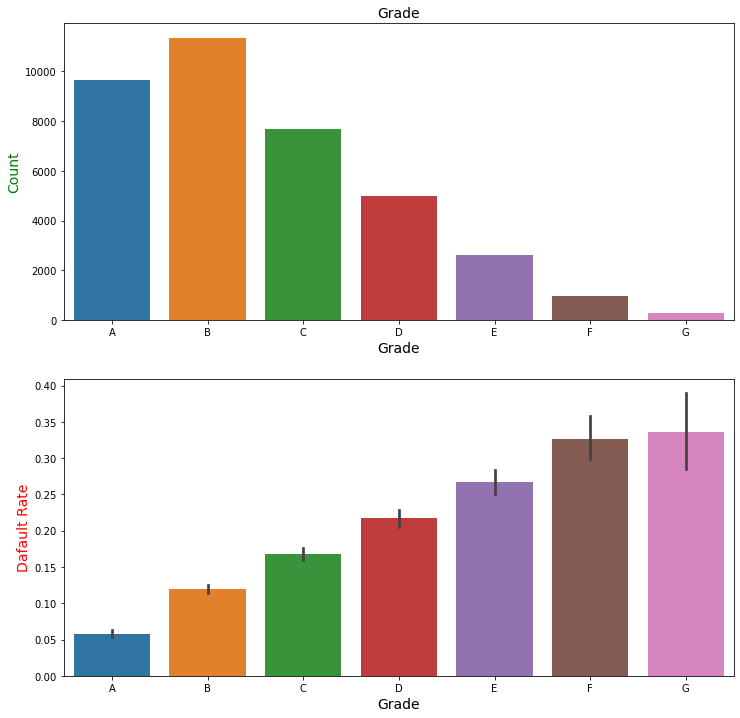

In [142]:
plot_var('grade', 'Grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

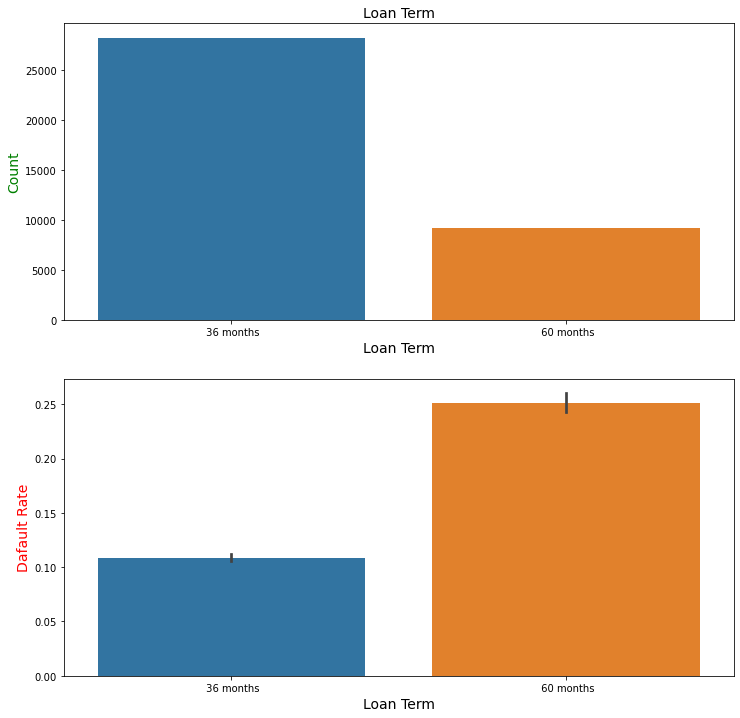

In [143]:
# term: 60 months loans default more than 36 months loans
plot_var('term', "Loan Term")

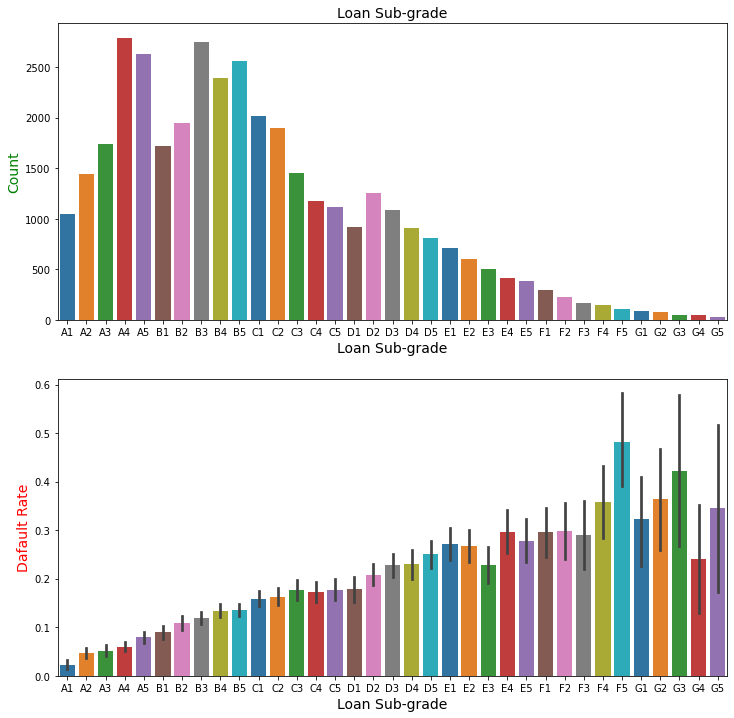

In [144]:
# sub-grade: as expected - A1 is better than A2, and A2 is better than A3 and so on 
plot_var('sub_grade', "Loan Sub-grade")

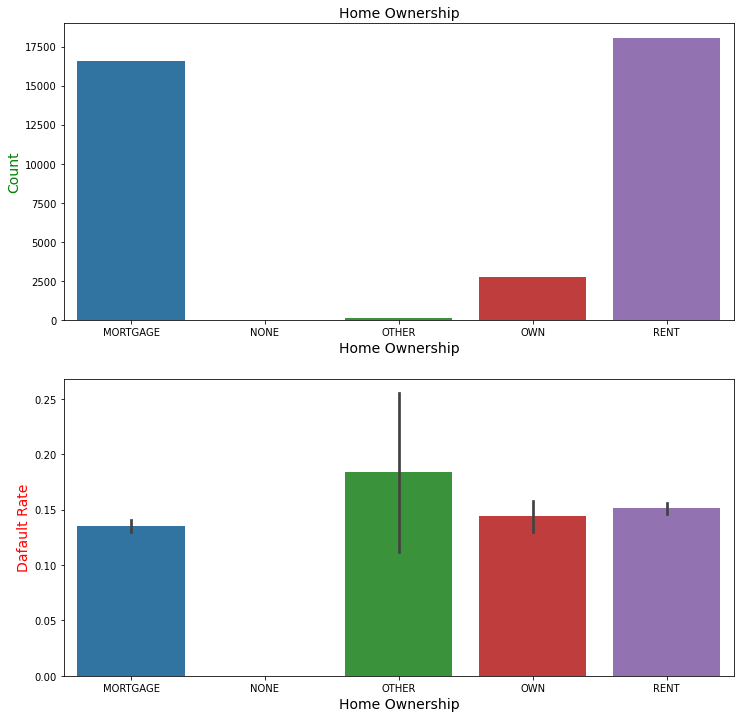

In [145]:
# home ownership: not a great discriminator for deafult
plot_var('home_ownership', "Home Ownership")

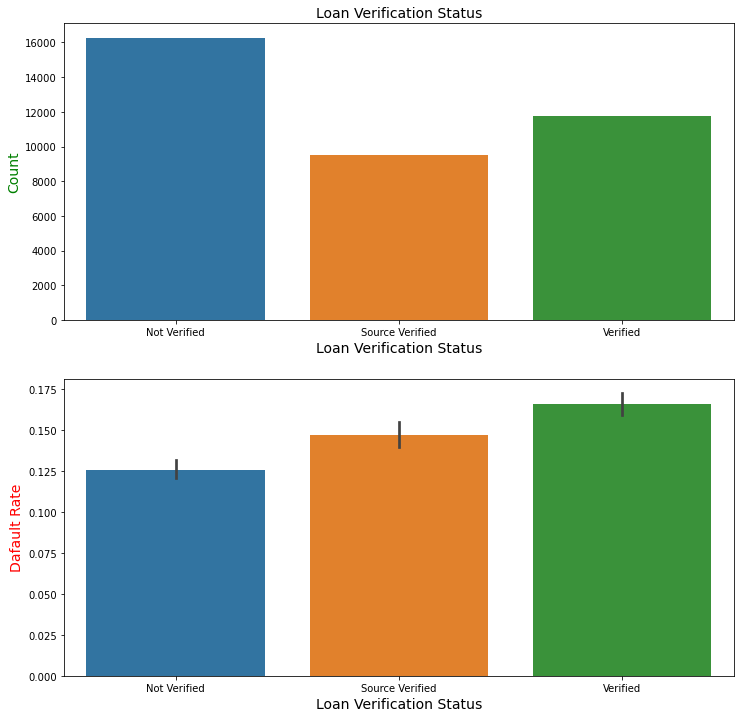

In [146]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_var('verification_status', "Loan Verification Status")

In [147]:
loan.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

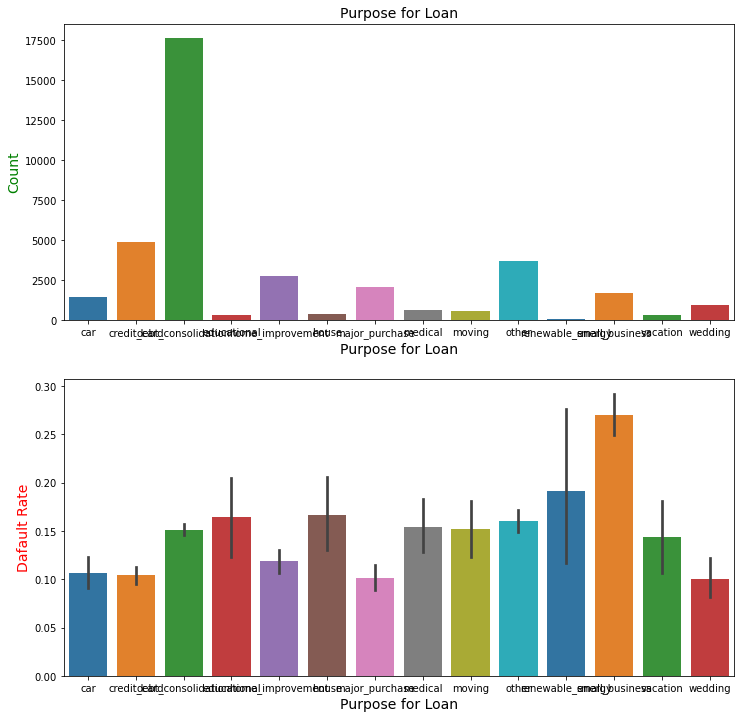

In [148]:
# purpose: small business loans defualt the most
plot_var('purpose', "Purpose for Loan")

**Analyzing the data per State/Region**

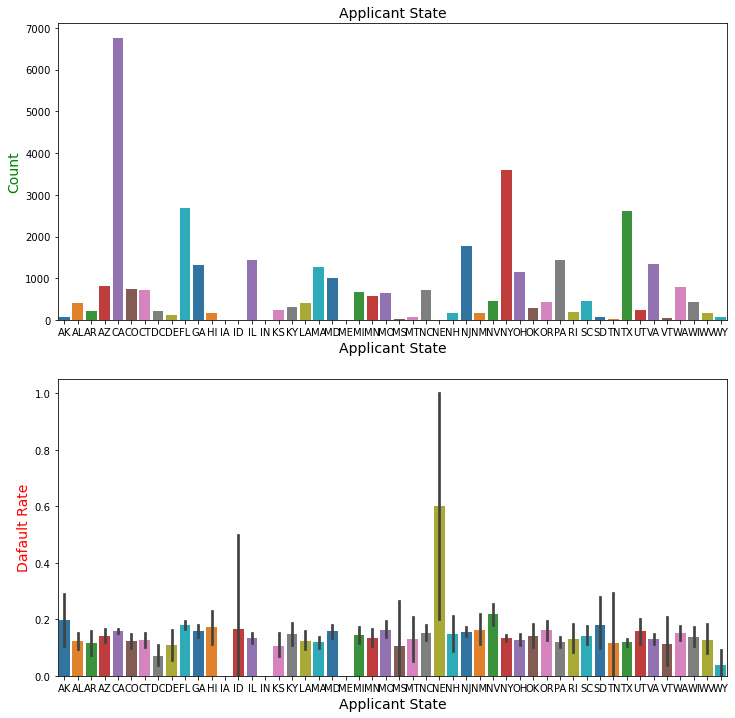

In [149]:
# State wise default rate
plot_var('addr_state', "Applicant State")

**We can observe that `NE` has the highest defualt Rate**

However, this looks clumsy and not easy to compare with. It would be nie to plot the graph on **USA map** istead. Let's do that using `plotly`. In order to that, we will prepare the data per state wise and store the default rate per state. 

Plotly parameters you need to specify in the code template:

- `locations`: This should be the name of the column that represents the U.S. states in your dataframe. Make sure you provide locations as two-letter state abbreviations.
- `locationmode`: one of ‘ISO-3’, ‘USA-states’, or ‘country names’. Use ‘USA-states’ in this case.
- `scope`: possible values – ‘world’, ‘usa’, ‘europe’, ‘asia’, ‘africa’, ‘north america’, or ‘south america’. Default is `world` 
- `color`: This should be the name of the column that represents the metric you want to visualize by state.


In [150]:
df = loan[loan['addr_state'] == 'NE']
df['loan_status']

38685    0
39500    1
39651    0
39667    1
39668    1
Name: loan_status, dtype: int64

In [151]:
# overall default rate
round(np.mean(loan['loan_status']*100), 2)
# Data Prep
df_state1 = loan.groupby(["addr_state"], as_index=False)["loan_status"].mean()
df_state1

,addr_state,loan_status
0,AK,0.197368
1,AL,0.122010
2,AR,0.114537
3,AZ,0.141439
4,CA,0.158688
5,CO,0.122312
6,CT,0.125884
7,DC,0.071090
8,DE,0.109091
9,FL,0.178916


In [215]:
# Plot the Graph
import plotly.express as px
fig = px.choropleth(df_state1,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",  # put "north america" to see entire north america map
                    color='loan_status',
                    color_continuous_scale="rdylgn_r", # could be Viridis_r, ylgnbu, rdylbu, rdylbu_r, mint, hot etc..
                    )
fig.update_layout(
      title_text = 'Loan Default Rate Per USA-State',
      title_font_size = 20,
      title_font_color="purple", 
      title_x=0.45, 
         )


Again, we notice that state **`NE`** has highest default rate. 

We also want to see if there is any major differentiator among various region of USA. For that, we will derive the region first and then plot the graph.
- N - North East
- W - West
- M - Mid West
- S - South
- O - Other

In [153]:
print("No. of States:",loan.addr_state.nunique())
region_list = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

loan['region'] = loan.addr_state.replace(region_list)
print("Categorized Regions:", loan.region.unique())

No. of States: 50
Categorized Regions: ['W' 'S' 'M' 'N' 'O']


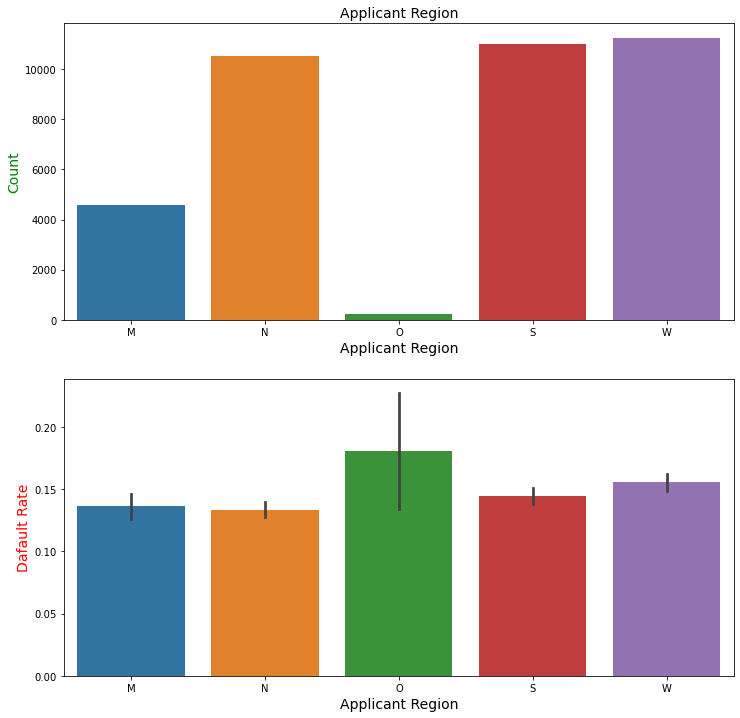

In [154]:
# purpose: small business loans defualt the most
plot_var('region', "Applicant Region")

It is very evident that region **`other`** has lowest number of application, but has highest default Rate.

In [155]:
import hvplot.pandas

In [156]:
for col in loan.columns:
    print(col, loan[col].nunique())

id 37544
member_id 37544
loan_amnt 866
funded_amnt 1016
funded_amnt_inv 7945
term 2
int_rate 370
installment 14801
grade 7
sub_grade 35
emp_title 27982
emp_length 10
home_ownership 5
annual_inc 5006
verification_status 3
issue_d 55
loan_status 2
pymnt_plan 1
purpose 14
addr_state 50
dti 2848
initial_list_status 1
policy_code 1
application_type 1
acc_now_delinq 1
delinq_amnt 1
region 5


In [157]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37544 non-null  int64  
 1   member_id            37544 non-null  int64  
 2   loan_amnt            37544 non-null  int64  
 3   funded_amnt          37544 non-null  int64  
 4   funded_amnt_inv      37544 non-null  float64
 5   term                 37544 non-null  object 
 6   int_rate             37544 non-null  float64
 7   installment          37544 non-null  float64
 8   grade                37544 non-null  object 
 9   sub_grade            37544 non-null  object 
 10  emp_title            36136 non-null  object 
 11  emp_length           37544 non-null  int64  
 12  home_ownership       37544 non-null  object 
 13  annual_inc           37544 non-null  float64
 14  verification_status  37544 non-null  object 
 15  issue_d              37544 non-null 

In [158]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
loan['issue_d'].value_counts()

Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [159]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [160]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [161]:
# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

You can see that the number of loans has increased steadily across years. 

In [162]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

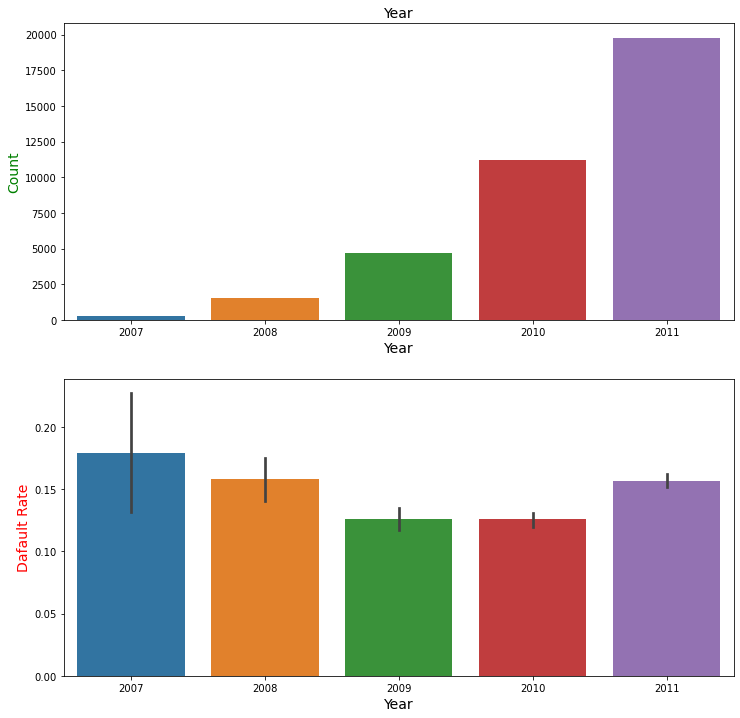

In [163]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_var('year', "Year")

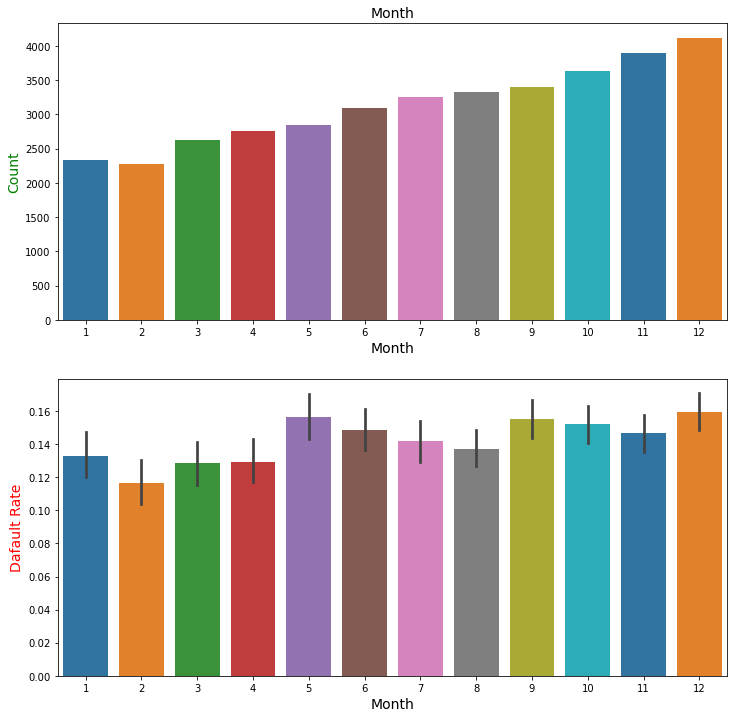

In [164]:
# comparing default rates across months: not much variation across months
plot_var('month', "Month")

Let's now analyse how the loan default rate varies across **continuous variables**.

##### Loan Amount

In [165]:
loan['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

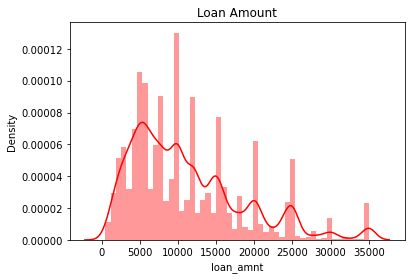

In [166]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan['loan_amnt'], color = 'r').set(title='Loan Amount')
plt.show()

In [167]:
loan.hvplot.hist(
    y='loan_amnt', by='loan_status', title="Loan Status by Loan Amount", 
    xlabel='Loan Amount', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [loan_amnt]   (loan_amnt_count)

The easiest way to analyse how default rates vary across continous variables is to **bin the variables** into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high. You can take a clue from data distribution for the binning.

In [168]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))


In [169]:
loan['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

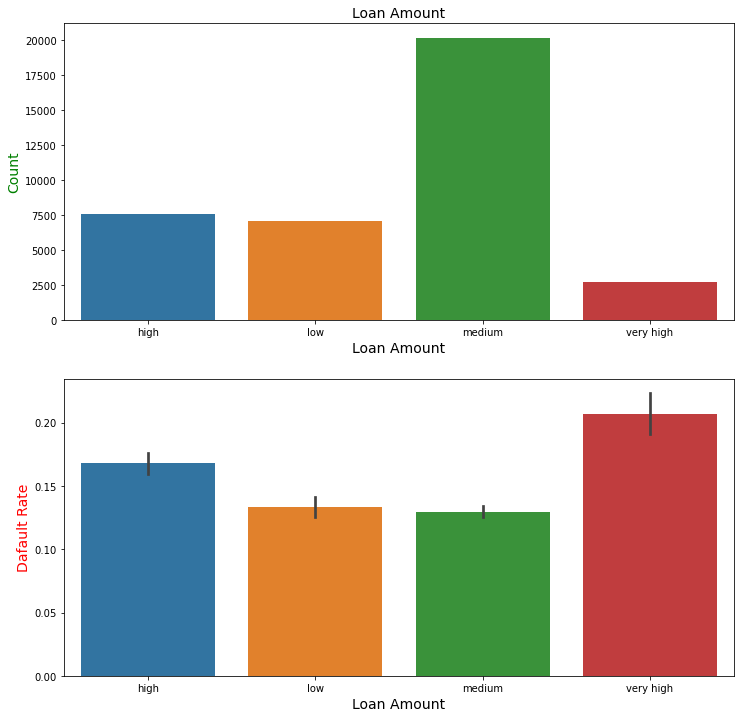

In [170]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_var('loan_amnt', "Loan Amount")

##### Funded Amount

In [171]:
loan.hvplot.hist(
    y='funded_amnt_inv', by='loan_status', title="Loan Status by funded_amnt_inv", 
    xlabel='funded_amnt_inv', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [funded_amnt_inv]   (funded_amnt_inv_count)

In [172]:
# let's also convert funded amount invested to bins
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

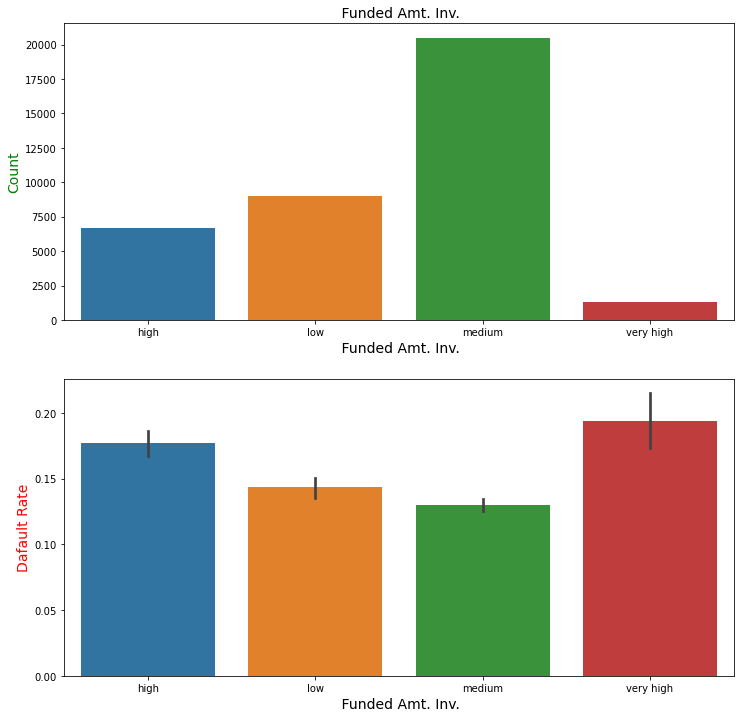

In [173]:
# funded amount invested
plot_var('funded_amnt_inv', " Funded Amt. Inv.")

#### Interest Rate

In [174]:
loan.hvplot.hist(
    y='int_rate', by='loan_status', title="Loan Status by Interest Rate", 
    xlabel='Interest Rate', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [int_rate]   (int_rate_count)

In [175]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

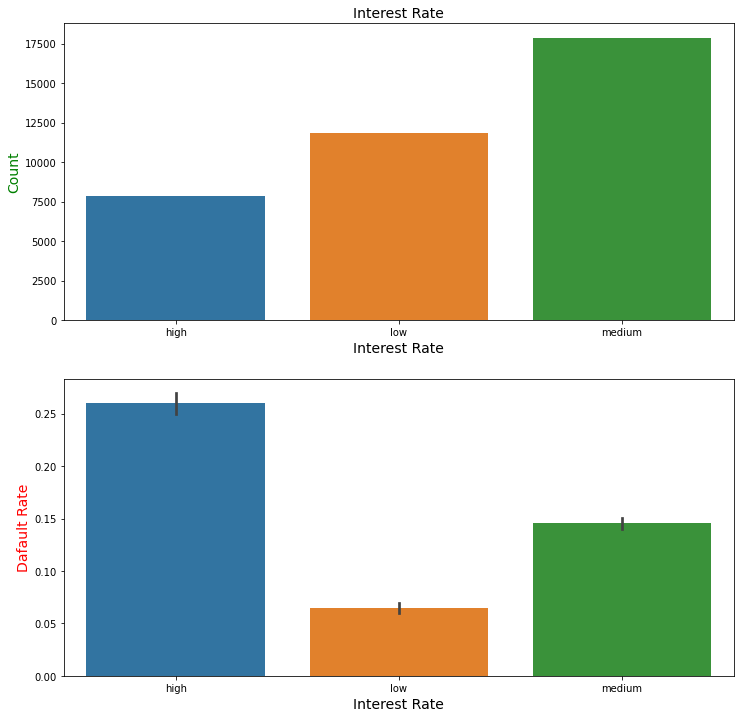

In [176]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_var('int_rate', 'Interest Rate')

#### dti (debt-to-income ratio)

In [177]:
loan.hvplot.hist(
    y='dti', by='loan_status', title="Loan Status by debt-to-income ratio", 
    xlabel='dti', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [dti]   (dti_count)

In [178]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

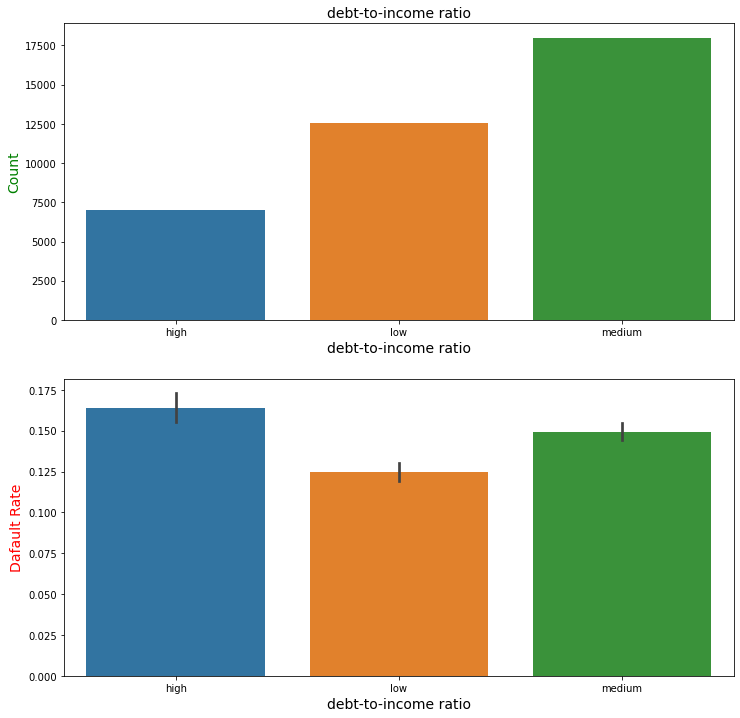

In [179]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_var('dti', "debt-to-income ratio")

#### Installment

In [180]:
loan.hvplot.hist(
    y='installment', by='loan_status', title="Loan Status by Installment", 
    xlabel='Installments', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [installment]   (installment_count)

In [181]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

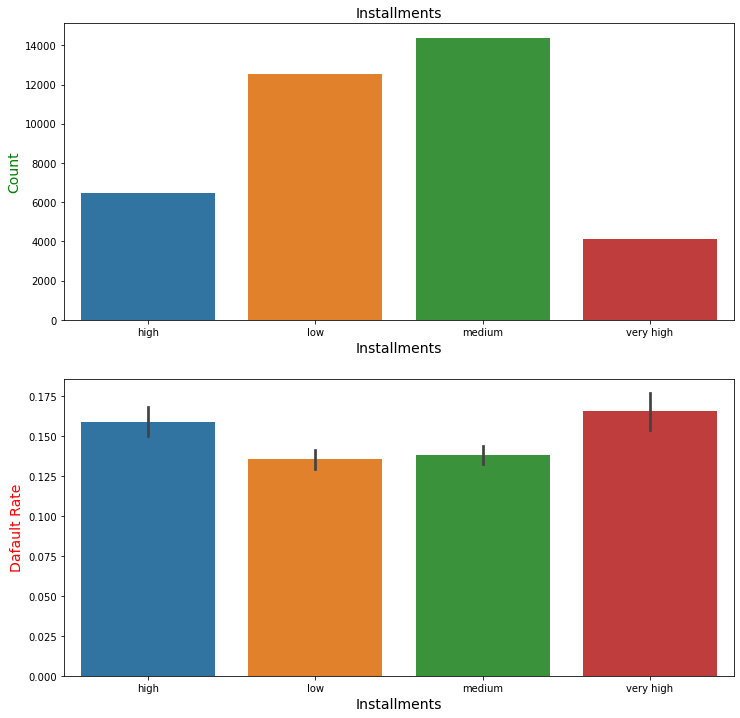

In [182]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_var('installment', 'Installments')

#### Annual Income

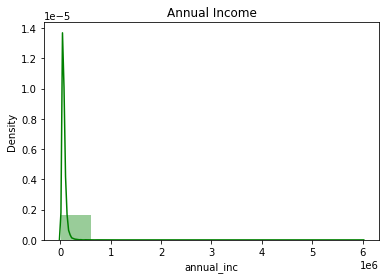

In [183]:
# Annual Income: 
sns.distplot(loan['annual_inc'], bins = 10, color = 'green').set(title='Annual Income')
plt.show()

In [184]:
loan.hvplot.hist(
    y='annual_inc', by='loan_status', bins = 100, title="Loan Status by Annual Income", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [185]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

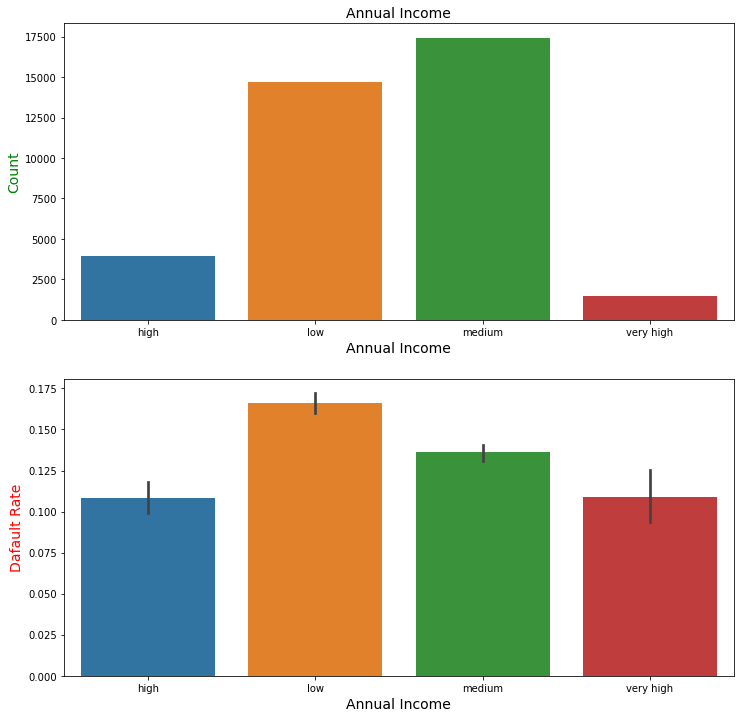

In [186]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_var('annual_inc', 'Annual Income')

#### Employee Length

In [187]:
loan.hvplot.hist(
    y='emp_length', by='loan_status', title="Loan Status by Emp Length", 
    xlabel='Emp Length', ylabel='Loans Counts', legend='right'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [emp_length]   (emp_length_count)

In [188]:
# employment length

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length(x))

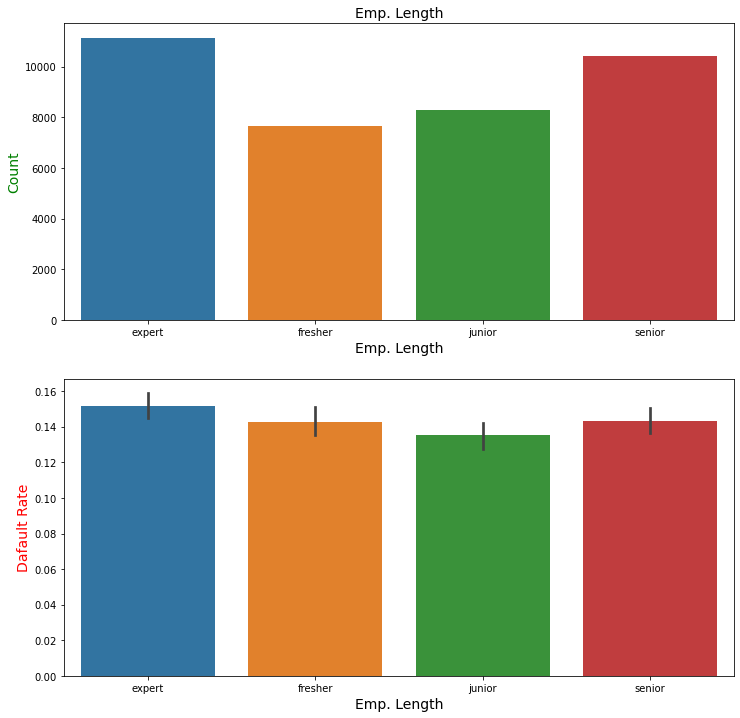

In [189]:
# emp_length and default rate
# not much of a predictor of default
plot_var('emp_length', "Emp. Length")

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade, and dti ratio.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. So, exploting this knowledge, we will examin the default rates across the purpose of the loan.


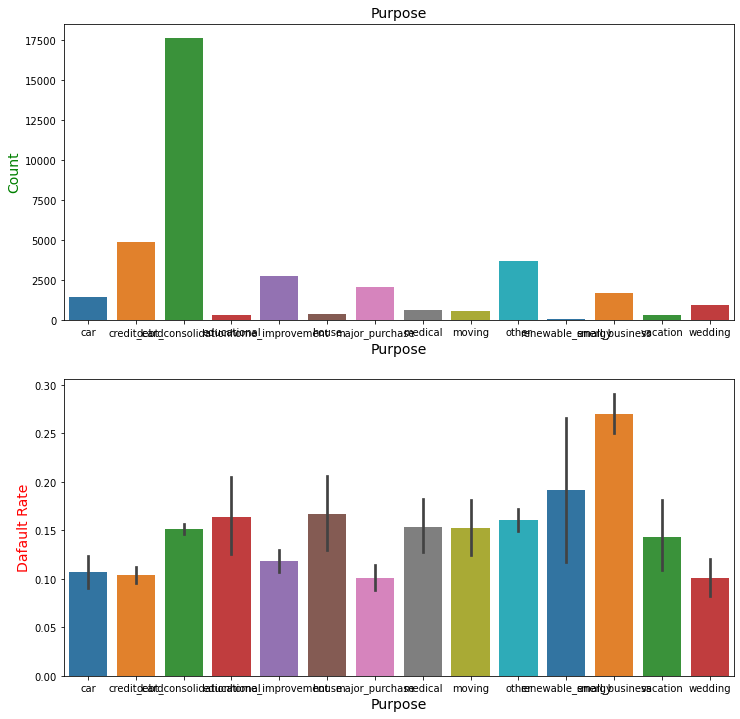

In [190]:
# purpose: small business loans defualt the most, then renewable energy and education
plot_var('purpose', "Purpose")

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [191]:
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [192]:
# filtering the df for the 4 types of loans mentioned above ("Other" doesn't gibe much info")
main_purposes = ["debt_consolidation", "credit_card","home_improvement","major_purchase"]
df = loan[loan['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

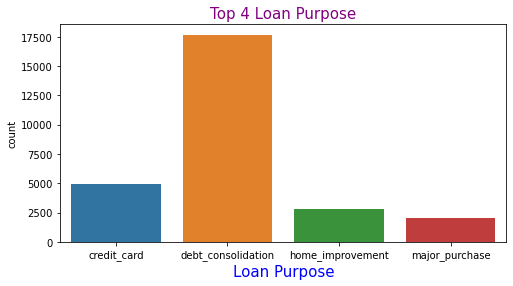

In [193]:
# plotting number of loans by purpose 
plt.figure(figsize = (8,4))
sns.countplot(x=df['purpose'])
plt.title("Top 4 Loan Purpose", fontsize = 15, color = "purple")
plt.xlabel("Loan Purpose", fontsize = 15, color = "blue")
plt.show()

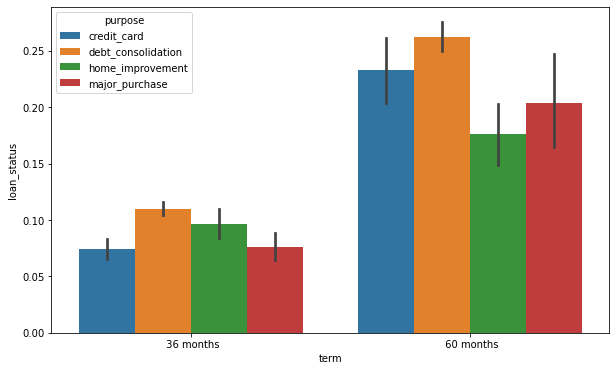

In [194]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


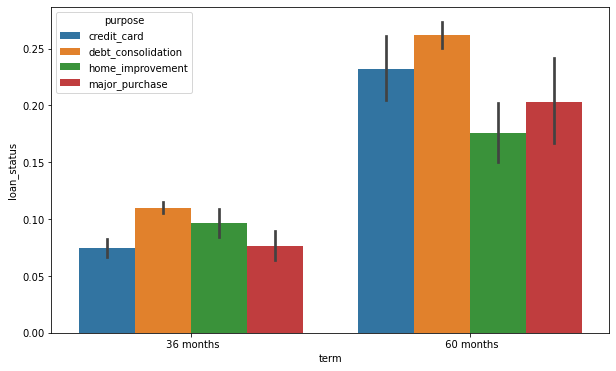

In [195]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

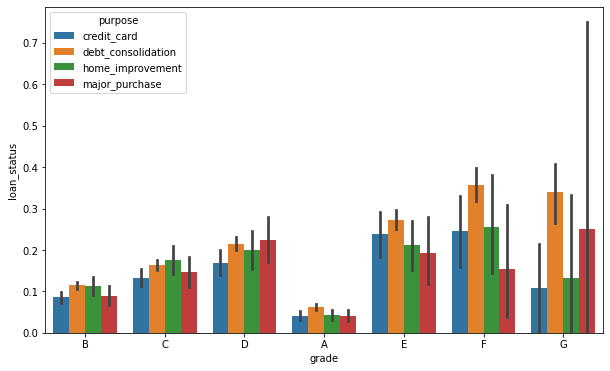

In [196]:
# grade of loan
plot_segmented('grade')

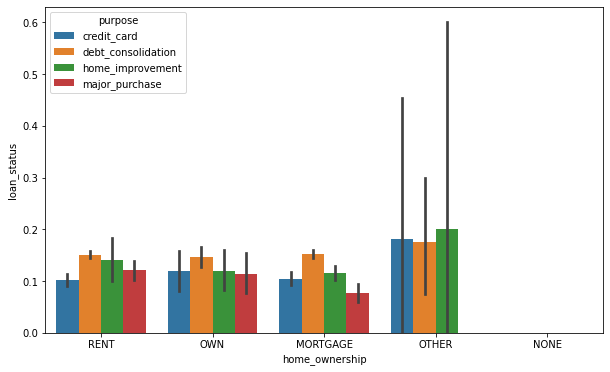

In [197]:
# home ownership
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

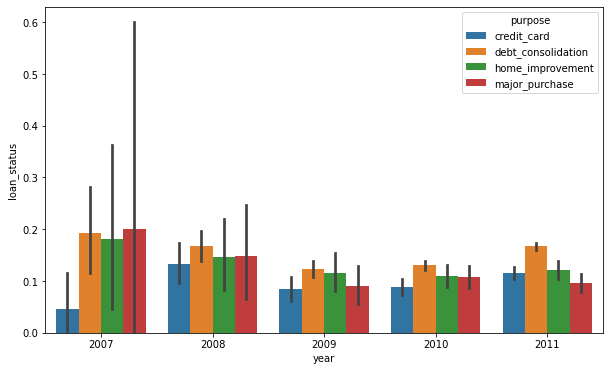

In [198]:
# year
plot_segmented('year')

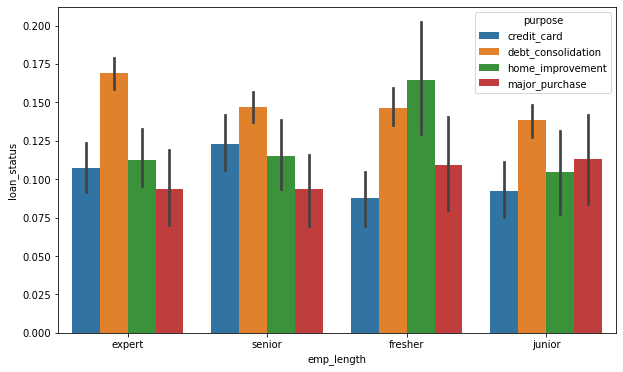

In [199]:
# emp_length
plot_segmented('emp_length')

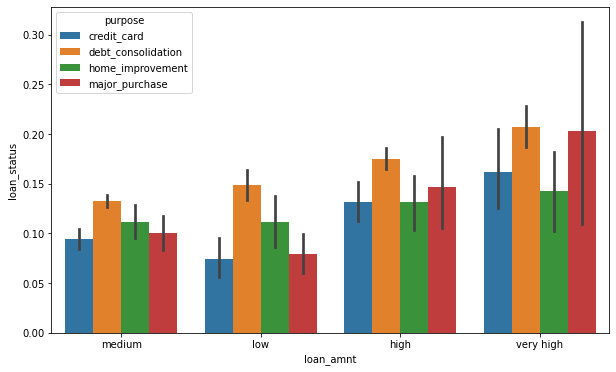

In [200]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

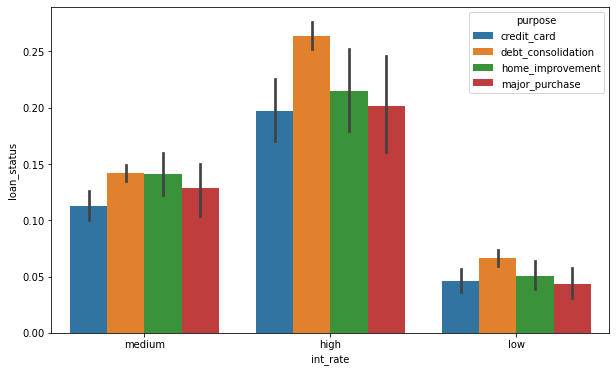

In [201]:
# interest rate
plot_segmented('int_rate')

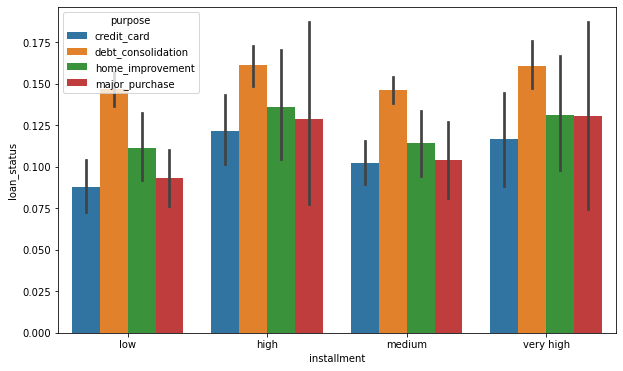

In [202]:
# installment
plot_segmented('installment')

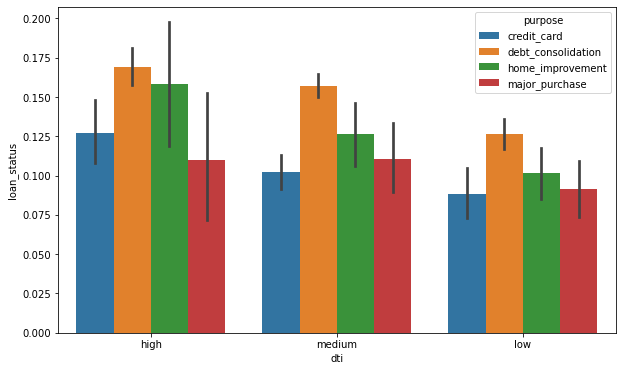

In [203]:
# debt to income ratio
plot_segmented('dti')

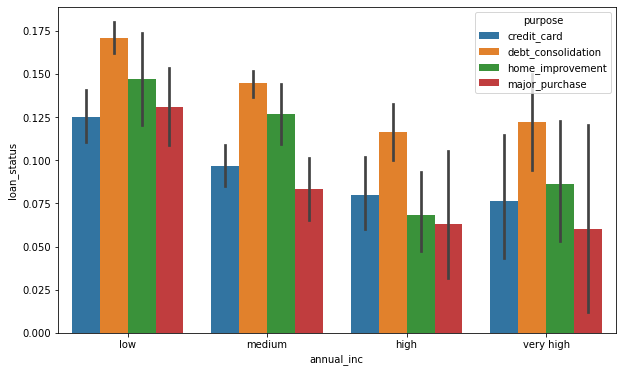

In [204]:
# annual income
plot_segmented('annual_inc')

## 4. Recommendations to Business

**There is a more probability of defaulting when:**

**1. Uni-variate Analysis:**

 - `Loan Amount` Inference: Loan default rate increases as loan amount increases [Loan Amount > 25K →very 
high]
- `Int. Rate` Inference: Loan default rate is most for Int. rate between 15% and 20%
- `Annual Income` Inference: low income group people defaults most compared to high income group [ 40K < Income < 
85K  →low income]
- `dti` Inference: people with high debt to income ratio defaults the most

**2. Bi-variate Analysis:**

- `Purpose/Grade` Inference: The default rate of the Loan increases significantly for category 'Other' as grade decreases from A to G
- `Purpose/Term` Inference: The default rate of the Loan increases significantly for ALL 4 purpose for loan term 60 months
- `Purpose/Emp. Length` Inference: We have seen that employee with 10+ years of exp. default the most. However, loan taken for "home improvement“ is defaulted most by employee with 0-1 year of exp.
- `Purpose/Loan Amount` Inference: As the loan amount increases, default rate increases. Moreover, default rate for loan taken for credit card purpose increases significantly with loan amount.
- `Purpose/Annual Inc.` Inference: High default rate can be observed for loan purpose 'other' and 'debt_consolidation' even in low income group people.

**End Of Assignment**